# Preprocesamiento de Datos - Predicción de Stroke

## Objetivo
Realizar el preprocesamiento completo de los datos para prepararlos para el modelado de Machine Learning, incluyendo:
- Manejo de valores faltantes
- Codificación de variables categóricas
- Escalado/normalización
- Balanceo del dataset
- División en train/test


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings('ignore')

print("Librerías importadas correctamente")


Librerías importadas correctamente


## Carga y Limpieza Inicial del Dataset

Carga del dataset y eliminación de variables no relevantes para el modelado.


In [2]:
# Cargar el dataset
df = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

print(f"Forma: {df.shape}")
print(f"Variables: {list(df.columns)}")
print(f"Valores faltantes: {df.isnull().sum().sum()}")

# Eliminar la columna 'id' ya que no aporta información para el modelado
df_clean = df.drop('id', axis=1)

print(f"\nForma después de eliminar 'id': {df_clean.shape}")
df_clean.head()


Forma: (5110, 12)
Variables: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
Valores faltantes: 201

Forma después de eliminar 'id': (5110, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 1. Manejo de Valores Faltantes

Identificación e imputación de valores faltantes usando estrategias apropiadas para cada variable.


In [3]:
# 1. MANEJO DE VALORES FALTANTES
# Identificar valores faltantes
missing_data = df_clean.isnull().sum()
print("Valores faltantes por variable:")
print(missing_data[missing_data > 0])

# Imputar valores faltantes en BMI usando la mediana
if 'bmi' in df_clean.columns and df_clean['bmi'].isnull().sum() > 0:
    imputer = SimpleImputer(strategy='median')
    df_clean['bmi'] = imputer.fit_transform(df_clean[['bmi']]).flatten()
    print(f"\nBMI imputado con la mediana: {df_clean['bmi'].median():.2f}")

# Verificar que no hay valores faltantes
print(f"\nValores faltantes después de imputación: {df_clean.isnull().sum().sum()}")


Valores faltantes por variable:
bmi    201
dtype: int64

BMI imputado con la mediana: 28.10

Valores faltantes después de imputación: 0


## 2. Codificación de Variables Categóricas

Conversión de variables categóricas a formato numérico usando codificación One-Hot para evitar ordenamiento artificial.


In [4]:
# 2. CODIFICACIÓN DE VARIABLES CATEGÓRICAS
# Identificar variables categóricas
categorical_vars = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_vars = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

print("Variables categóricas:", categorical_vars)
print("Variables numéricas:", numerical_vars)

# Crear una copia para trabajar
df_encoded = df_clean.copy()

# Codificación One-Hot para variables categóricas
print("\nCodificando variables categóricas...")
df_encoded = pd.get_dummies(df_encoded, columns=categorical_vars, drop_first=True)

print(f"Forma después de codificación: {df_encoded.shape}")
print(f"Nuevas variables: {list(df_encoded.columns)}")

# Mostrar las primeras filas
df_encoded.head()


Variables categóricas: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Variables numéricas: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

Codificando variables categóricas...
Forma después de codificación: (5110, 17)
Nuevas variables: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False


## 3. División en Variables Independientes y Dependiente

Separación de las variables predictoras (X) y la variable objetivo (y) para el modelado.


In [5]:
# 3. DIVISIÓN EN VARIABLES INDEPENDIENTES Y DEPENDIENTE
# Separar variables independientes (X) y dependiente (y)
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

print(f"Variables independientes (X): {X.shape}")
print(f"Variable dependiente (y): {y.shape}")
print(f"Distribución de la variable objetivo:")
print(y.value_counts())
print(f"Porcentaje de casos con stroke: {y.mean()*100:.2f}%")


Variables independientes (X): (5110, 16)
Variable dependiente (y): (5110,)
Distribución de la variable objetivo:
stroke
0    4861
1     249
Name: count, dtype: int64
Porcentaje de casos con stroke: 4.87%


## 4. División en Conjuntos de Entrenamiento y Prueba

División estratificada de los datos para mantener la proporción de clases en ambos conjuntos.


In [6]:
# 4. DIVISIÓN EN TRAIN/TEST
# División estratificada para mantener la proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")
print(f"Proporción train/test: {X_train.shape[0]/X_test.shape[0]:.2f}")

# Verificar que la proporción de clases se mantiene
print(f"\nDistribución en entrenamiento:")
print(f"Stroke: {y_train.sum()} casos ({y_train.mean()*100:.2f}%)")
print(f"Distribución en prueba:")
print(f"Stroke: {y_test.sum()} casos ({y_test.mean()*100:.2f}%)")


Conjunto de entrenamiento: 4088 muestras
Conjunto de prueba: 1022 muestras
Proporción train/test: 4.00

Distribución en entrenamiento:
Stroke: 199 casos (4.87%)
Distribución en prueba:
Stroke: 50 casos (4.89%)


## 5. Escalado y Normalización

Aplicación de StandardScaler para normalizar las variables numéricas y mejorar el rendimiento de los algoritmos.


In [7]:
# 5. ESCALADO/NORMALIZACIÓN
# Aplicar StandardScaler a los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de vuelta a DataFrame para mantener nombres de columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Escalado aplicado usando StandardScaler")
print(f"Media de variables escaladas (entrenamiento): {X_train_scaled.mean().mean():.6f}")
print(f"Desviación estándar de variables escaladas (entrenamiento): {X_train_scaled.std().mean():.6f}")

# Mostrar estadísticas antes y después del escalado
print(f"\nEstadísticas originales (primeras 5 variables):")
print(X_train.iloc[:, :5].describe())

print(f"\nEstadísticas escaladas (primeras 5 variables):")
print(X_train_scaled.iloc[:, :5].describe())


Escalado aplicado usando StandardScaler
Media de variables escaladas (entrenamiento): -0.000000
Desviación estándar de variables escaladas (entrenamiento): 1.000122

Estadísticas originales (primeras 5 variables):
               age  hypertension  heart_disease  avg_glucose_level  \
count  4088.000000   4088.000000    4088.000000        4088.000000   
mean     43.353288      0.097114       0.054061         106.317167   
std      22.596816      0.296148       0.226165          45.259652   
min       0.080000      0.000000       0.000000          55.120000   
25%      26.000000      0.000000       0.000000          77.312500   
50%      45.000000      0.000000       0.000000          91.945000   
75%      61.000000      0.000000       0.000000         114.197500   
max      82.000000      1.000000       1.000000         271.740000   

               bmi  
count  4088.000000  
mean     28.887989  
std       7.763471  
min      10.300000  
25%      23.800000  
50%      28.100000  
75%     

## 6. Balanceo del Dataset

Aplicación de SMOTE para balancear las clases desbalanceadas y mejorar el rendimiento del modelo en la clase minoritaria.


Aplicando SMOTE para balancear las clases...
Antes del balanceo:
  Clase 0: 3889 muestras
  Clase 1: 199 muestras
  Ratio: 0.051

Después del balanceo (SMOTE):
  Clase 0: 3889 muestras
  Clase 1: 3889 muestras
  Ratio: 1.000


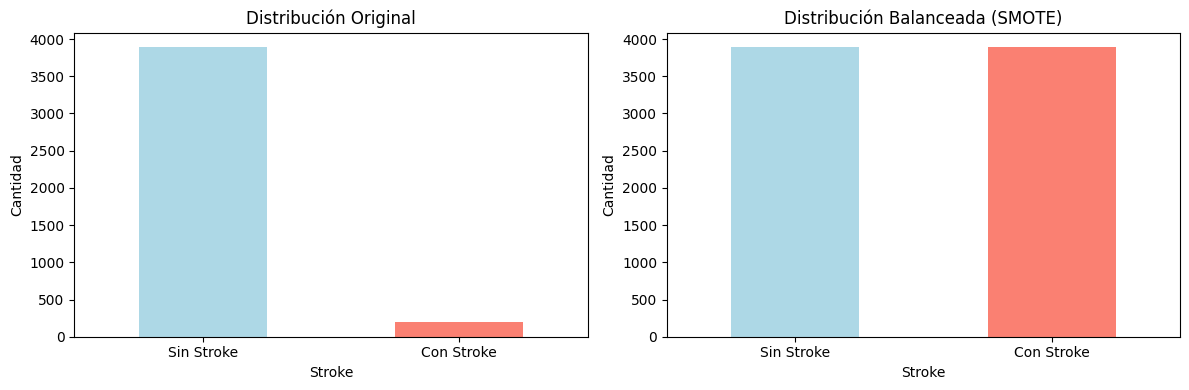

In [8]:
# 6. BALANCEO DEL DATASET
# Aplicar SMOTE para balancear el dataset
print("Aplicando SMOTE para balancear las clases...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"Antes del balanceo:")
print(f"  Clase 0: {(y_train == 0).sum()} muestras")
print(f"  Clase 1: {(y_train == 1).sum()} muestras")
print(f"  Ratio: {(y_train == 1).sum() / (y_train == 0).sum():.3f}")

print(f"\nDespués del balanceo (SMOTE):")
print(f"  Clase 0: {(y_train_balanced == 0).sum()} muestras")
print(f"  Clase 1: {(y_train_balanced == 1).sum()} muestras")
print(f"  Ratio: {(y_train_balanced == 1).sum() / (y_train_balanced == 0).sum():.3f}")

# Visualizar el balanceo
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Distribución Original')
plt.xlabel('Stroke')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Sin Stroke', 'Con Stroke'], rotation=0)

plt.subplot(1, 2, 2)
pd.Series(y_train_balanced).value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Distribución Balanceada (SMOTE)')
plt.xlabel('Stroke')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Sin Stroke', 'Con Stroke'], rotation=0)

plt.tight_layout()
plt.show()


## 7. Guardar Datos Preprocesados

Almacenamiento de todos los datos preprocesados para su uso en los modelos de Machine Learning.


In [9]:
# 7. GUARDAR DATOS PREPROCESADOS
# Guardar los datos preprocesados para usar en los modelos
np.save('../data/X_train_balanced.npy', X_train_balanced)
np.save('../data/y_train_balanced.npy', y_train_balanced)
np.save('../data/X_test_scaled.npy', X_test_scaled)
np.save('../data/y_test.npy', y_test)

# Guardar también los datos sin balancear para comparación
np.save('../data/X_train_scaled.npy', X_train_scaled)
np.save('../data/y_train.npy', y_train)

# Guardar el scaler para uso posterior
import joblib
joblib.dump(scaler, '../data/scaler.pkl')

print("Datos preprocesados guardados:")
print("  - X_train_balanced.npy: Variables independientes balanceadas")
print("  - y_train_balanced.npy: Variable objetivo balanceada")
print("  - X_test_scaled.npy: Variables de prueba escaladas")
print("  - y_test.npy: Variable objetivo de prueba")
print("  - scaler.pkl: Escalador entrenado")

# Resumen final
print(f"\n=== RESUMEN DEL PREPROCESAMIENTO ===")
print(f"Forma final de datos de entrenamiento balanceados: {X_train_balanced.shape}")
print(f"Forma final de datos de prueba: {X_test_scaled.shape}")
print(f"Número de características: {X_train_balanced.shape[1]}")
print(f"Distribución balanceada: {np.bincount(y_train_balanced)}")

# Mostrar las primeras filas de los datos finales
print(f"\nPrimeras 5 filas de datos balanceados:")
print(pd.DataFrame(X_train_balanced).head())


Datos preprocesados guardados:
  - X_train_balanced.npy: Variables independientes balanceadas
  - y_train_balanced.npy: Variable objetivo balanceada
  - X_test_scaled.npy: Variables de prueba escaladas
  - y_test.npy: Variable objetivo de prueba
  - scaler.pkl: Escalador entrenado

=== RESUMEN DEL PREPROCESAMIENTO ===
Forma final de datos de entrenamiento balanceados: (7778, 16)
Forma final de datos de prueba: (1022, 16)
Número de características: 16
Distribución balanceada: [3889 3889]

Primeras 5 filas de datos balanceados:
        age  hypertension  heart_disease  avg_glucose_level       bmi  \
0  0.205661     -0.327962      -0.239061          -0.819973  0.542609   
1 -1.254901     -0.327962      -0.239061           0.352075 -1.016163   
2  1.046590     -0.327962      -0.239061           0.090662 -0.513749   
3  0.028623     -0.327962      -0.239061          -0.903944 -0.526632   
4 -1.299160     -0.327962      -0.239061          -0.529834  0.349372   

   gender_Male  gender_Other 